## Multiclass Logistic Regression model on Wine Quality
I am going to build a Multiclass Logistic Regression model that predicts the quality of red wine in range of 1 to 10

Link to the Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

The predictive model is built following the steps below:

Exploratory Data Analysis (EDA) - understanding the dataset and the underlying interactions between the different variables

Data Pre-processing - preparing the data for modelling

Building the model

Evaluating the performance of the model, and possibly fine-tune and tweak it if necessary


The goal of the model is to predict the quality of red wine in range of 1 to 10

In [1]:
# Loading libraries

import pandas as pd
import matplotlib.pyplot as plt

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset

# In read_csv() function below, passed the location to where the files are located in the UCI website. The data is separated by ';'
# so used separator as ';' (sep = ";")
red_wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")

red_wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


The variables are:




*   fixed acidity
*   volatile acidity
*   citric acid
*   residual sugar
*   chlorides
*   free sulfur dioxide
*   total sulfur dioxide
*   density
*   pH
*   sulphates
*   alcohol Output variable (based on sensory data):
*   quality (score between 0 (very bad) and 10 (excellent) graded by wine experts) - **Target Variable**

## 1. Exploratory Data Analysis (EDA) - understanding the dataset and the underlying interactions between the different variables

In [3]:
red_wine_data.shape

(1599, 12)

In [4]:
red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
red_wine_data['quality'].mean()

5.6360225140712945

Quick examination on the dataset:

1599 rows (wine) of data

no missing values in the dataframe

mean quality score of 1599 wine is 5.64

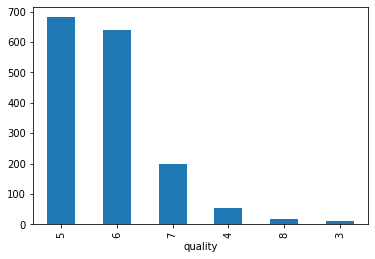

In [6]:
quality_bar = red_wine_data['quality'].value_counts()

quality_bar.plot(kind='bar')

plt.xlabel("quality")

plt.show()

Observation on the Target variable - quality

While the quality of wine is scored in the range of 0 to 10, most of the wine in the dataset are in the range between 5 to 7, meaning they are of average quality, with some poor and good quality wine


# 2. Data Pre-processing - preparing the data for modelling


There is no missing values in the dataframe and already checked that all variables are numeric

In [7]:
# Separating input variables (X) and target variable (y)

X = red_wine_data.drop('quality', axis =1)
y = red_wine_data['quality']

Train and Test Split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# 3. Building the model

In [9]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

Now the Logistic Regression model has been trained and I will use the trained model to predict the Target value (the quality of wine) for the test data using predict method

In [10]:
predictions = log_model.predict(X_test)

Now comparing actual target values (y_test in this case) and the predicted values (the quality score of wine) for X_test by the trained model (log_model)

In [11]:
# actual target values
y_test.values

array([6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 7, 3, 5, 5, 6, 7, 5, 7, 8, 5, 5, 6,
       5, 6, 6, 6, 7, 6, 5, 6, 5, 5, 6, 5, 6, 5, 7, 5, 4, 6, 5, 5, 7, 5,
       5, 6, 7, 6, 5, 6, 5, 5, 5, 7, 6, 6, 6, 5, 5, 5, 5, 7, 5, 6, 6, 5,
       6, 5, 6, 5, 6, 4, 6, 6, 6, 5, 8, 5, 6, 6, 5, 6, 5, 6, 6, 7, 5, 6,
       7, 4, 7, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 7, 6, 7, 6, 5, 6, 5,
       8, 5, 6, 5, 6, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 6, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 7, 6, 8, 5, 5, 5, 6, 6, 6, 5, 6, 7, 6, 5,
       6, 5, 5, 6, 6, 6, 7, 5, 7, 5, 5, 5, 6, 6, 5, 5, 6, 5, 7, 6, 7, 6,
       6, 5, 5, 6, 4, 6, 5, 7, 5, 5, 4, 5, 7, 6, 5, 6, 6, 7, 6, 5, 5, 6,
       5, 7, 5, 6, 6, 5, 7, 5, 5, 5, 6, 7, 7, 5, 5, 6, 6, 7, 6, 5, 6, 6,
       6, 6, 6, 7, 4, 5, 5, 7, 5, 5, 5, 5, 6, 6, 5, 7, 5, 6, 6, 6, 5, 4,
       6, 7, 6, 7, 5, 6, 6, 5, 5, 6, 5, 6, 4, 5, 6, 6, 5, 6, 6, 5, 5, 6,
       7, 7, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 7, 5, 5, 6, 5, 7,
       5, 6, 4, 6, 6, 8, 6, 5, 5, 6, 5, 7, 6, 6, 5,

In [12]:
# predicted values
predictions

array([5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5,
       6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5,
       6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6,
       6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6,
       6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6,
       6, 5, 5, 5, 5, 6, 5, 7, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5,
       5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5,
       6, 6, 6, 5, 6, 5, 7, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 7,
       6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6,
       5, 6, 5, 6, 5, 7, 5, 5, 5, 6, 5, 6, 6, 6, 6,

# 4. Evaluating the performance of the model, and possibly fine-tune and tweak it if necessary

Checking how accurate the trained model is using the accuracy_score class from sklearn.metrics

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[  0,   0,   1,   0,   0,   0],
       [  0,   0,  11,   6,   0,   0],
       [  0,   0, 139,  56,   0,   0],
       [  0,   0,  77, 121,   2,   0],
       [  0,   0,   4,  56,   1,   0],
       [  0,   0,   0,   5,   1,   0]])

Observed that class wise false positives (above the main diagonal) and the class wise false negatives (below the main diagonal) are almost symmetrical, so the accuracy score becomes the important metric here

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
accuracy_score(y_test, predictions)

0.54375

The model is predicting 54.38% correct results